In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Load original data
df = pd.read_csv("./data/creditcard_2023.csv")

### First Glance of Data 
- 데이터 살펴보기
    - Basic Statistics, data types
    - Imbalance of data (class)
    - Missing values
    - Duplicated values
    - Outliers 

In [3]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.describe()  # basic statistics for numerical cols - in this dataset, all cols are numerical:)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [5]:
df.info() # to check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
df['Class'].value_counts() # Yeah! class is perfectly balanced, so no needs for under/over sampling stuff to deal with imbalanced data

Class
0    284315
1    284315
Name: count, dtype: int64

In [7]:
df.isnull().any().any() # No missing values

False

In [8]:
df.duplicated().any() # No duplicated values

False

### Outliers?
- lower, upper bound 기준을 넉넉히 잡았음에도 불구하고, IQR 기준 outliers가 많다. 약 13%
- 보면, 평균값이 1 미만인 column에서 max가 100이 넘는 column들도 존재한다.
- 다만, card fraud 특성 상, 오히려 fraud = true 인 케이스들의 값이 유독 크거나 작을 수 있음. 따라서, 무작정 outliers를 제거하거나 처리하는 것 보다는 일단 포함한채로 학습을 진행해본다.
    - NN을 메인으로 쓸 것이기 때문에, 어느 정도 outliers 패턴을 잡아줄 것이라는 기대도 있고, 그렇지 않다면 robust model들을 쓰는 방법도 있음. (NN에서도 robust한 model이 있나?)

In [9]:
# Use IQR to check outiers
# Function to identify outliers using IQR
def find_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR  # default 1.5
        upper_bound = Q3 + 3 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers], axis=0)
    outliers = outliers.drop_duplicates()
    return outliers

# Check for outliers using IQR method
outliers_iqr = find_outliers_iqr(df)

In [10]:
outliers_iqr.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,...,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000,114144.000000
mean,388588.065593,-1.207153,0.851332,-1.091156,0.964125,-0.819303,-0.647580,-1.007983,0.324477,-0.800845,...,0.110428,-0.011394,0.144998,0.068709,0.100933,0.025311,0.250577,-0.180915,12025.982778,0.867948
std,126746.194372,0.770369,1.753465,0.933291,0.950408,1.725480,1.548550,1.651505,2.165853,1.368098,...,2.188570,1.895894,2.130217,1.079486,1.495585,0.998239,1.972372,1.943632,6921.046043,0.338549
min,7.000000,-3.495584,-49.966572,-3.183760,-4.951222,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919,...,-19.382523,-7.734798,-30.295450,-3.710133,-13.612633,-8.226969,-10.498633,-39.035243,50.350000,0.000000
25%,323059.750000,-1.805318,0.150308,-1.847101,0.503527,-1.886950,-1.752629,-2.002684,-0.405244,-1.789457,...,-0.217791,-0.733649,-0.713481,-0.702124,-0.729353,-0.533356,-0.761094,-1.377055,6010.030000,1.000000
50%,404907.500000,-1.148720,1.069015,-1.205391,1.198921,-1.014061,-0.899963,-1.286399,0.046806,-1.058656,...,0.321487,-0.012509,-0.034080,0.275117,0.019233,-0.046206,0.214449,0.254389,12022.360000,1.000000
75%,486442.000000,-0.690677,1.772903,-0.498895,1.638509,-0.160498,0.369256,-0.143075,1.256535,-0.046479,...,0.628534,0.626552,0.930769,0.875609,0.775106,0.808049,1.731485,0.948713,17996.317500,1.000000
max,568625.000000,2.115272,4.361865,14.125834,3.201536,42.716891,26.168402,217.873038,5.958040,20.270062,...,8.087080,12.632511,31.707627,12.965639,14.621509,5.623285,113.231093,77.255937,24039.930000,1.000000


In [11]:
outliers_iqr['Class'].value_counts() # portion of fraud case is much bigger in outliers df

Class
1    99071
0    15073
Name: count, dtype: int64

In [12]:
print(99071/(99071+15073))

0.8679475049060835


### Visualization
- Amount
    - min: 50.35, max: 24039.93, 이 range 안에서는 골고루 분포하고 있음.
    - 신용카드 사용량이기 때문에, 적게 사용하는 사람과 많이 사용하는 사람이 모두 골고루 있는게 자연스러움. 
    - Normally distributed
- Correlation 

In [13]:
import matplotlib.pyplot as plt                                     
import seaborn as sns                                              
%matplotlib inline

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

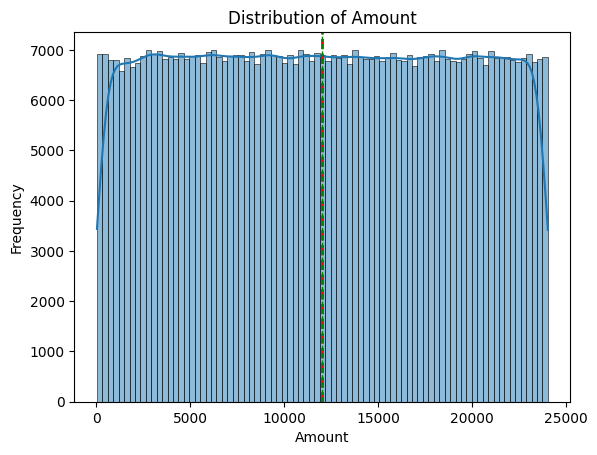

In [14]:
# Distribution of 'Amount' -> widely normally distributed
ax= sns.histplot(df['Amount'], kde=True)  # kde=True는 커널 밀도 추정을 함께 표시합니다.

# 평균 및 중앙값 표시
mean_value = df['Amount'].mean()
median_value = df['Amount'].median()

ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
ax.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

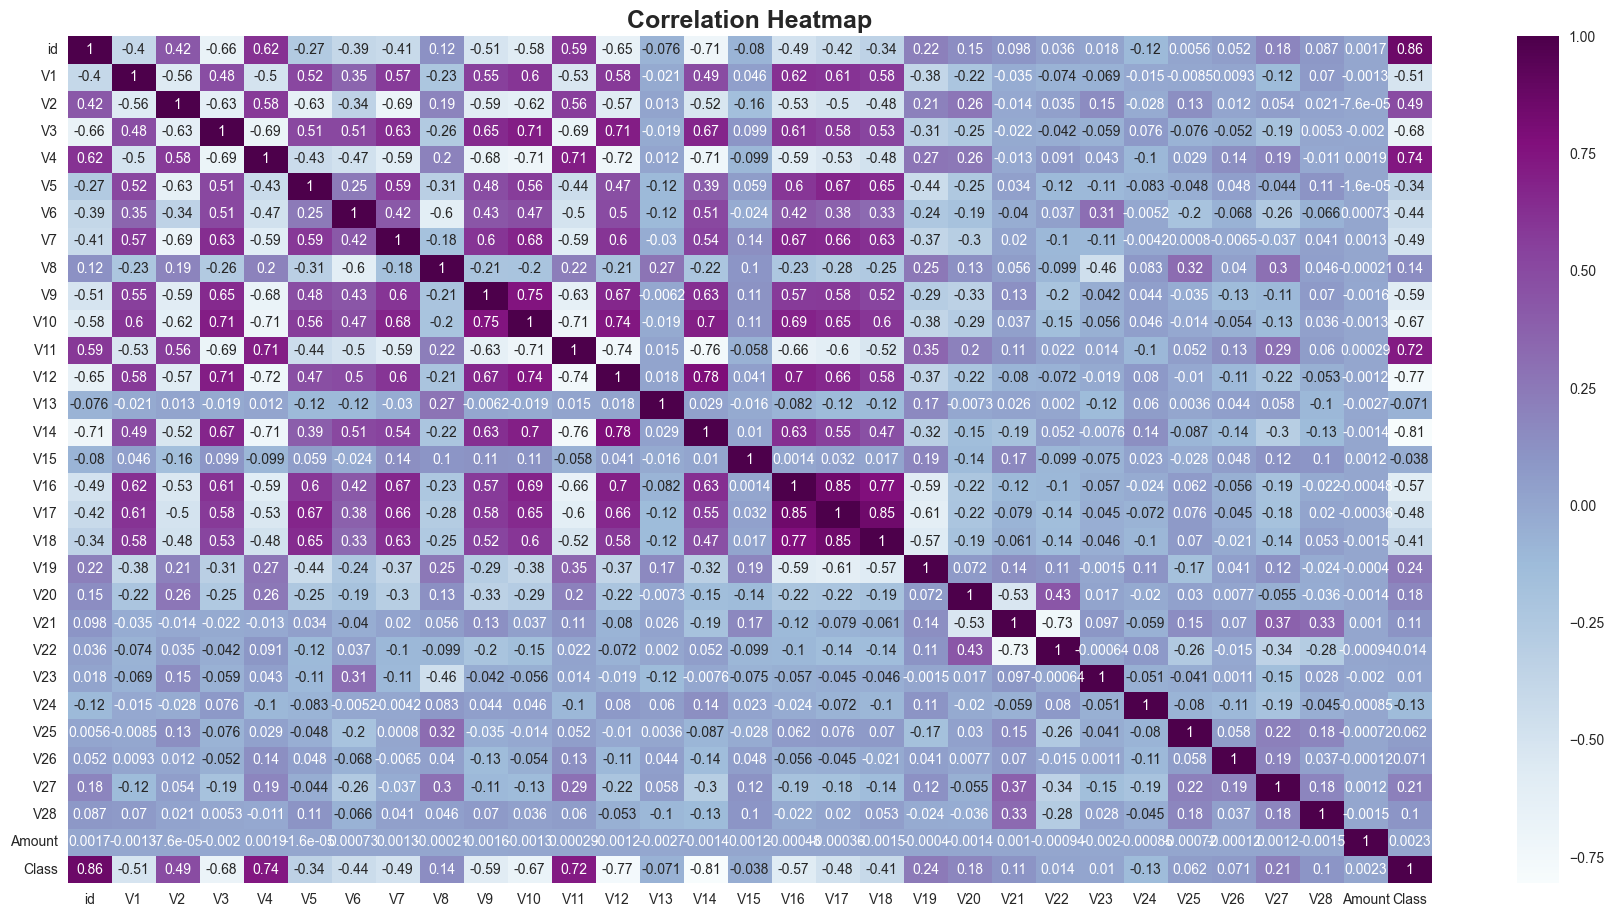

In [15]:
# Correlation Heatmap 
plt.style.use("seaborn")
plt.rcParams['figure.figsize']= (22,11)
title = "Correlation Heatmap"
plt.title(title,fontsize=18, weight= 'bold')
sns.heatmap(df.corr(), cmap="BuPu", annot=True)
plt.show()

In [16]:
# correlation matrix 계산
cor_matrix = df.corr()

## 'Class'에 대한 correlation이 0.5 이상 변수만 추출 
cor_matrix['Class'][abs(cor_matrix['Class'])>=0.5]

id       0.864283
V1      -0.505761
V3      -0.682095
V4       0.735981
V9      -0.585522
V10     -0.673665
V11      0.724278
V12     -0.768579
V14     -0.805669
V16     -0.573511
Class    1.000000
Name: Class, dtype: float64

In [17]:
# 'Amount'에 대해 correlation이 0.5 이상 변수만 추출 
cor_matrix['Amount'][abs(cor_matrix['Amount'])>=0.5]

Amount    1.0
Name: Amount, dtype: float64

### Data Preparation for Modeling
- Train & Test split
- Define X, y 
- Scaling

In [18]:
# Train & test split (without cross validation)
from sklearn.model_selection import train_test_split

trn_df, tst_df = train_test_split(df, test_size=0.2, shuffle=True, stratify=df['Class']) # stratify for equally distributed classes 

In [19]:
print(trn_df.shape, tst_df.shape)

(454904, 31) (113726, 31)


In [20]:
tst_df['Class'].value_counts()

Class
1    56863
0    56863
Name: count, dtype: int64

In [21]:
trn_df = trn_df.set_index('id')
tst_df = tst_df.set_index('id')

In [22]:
### Light version

# ------------------ 데이터 로드 --------------- #
# Dataset 불러오기 (train, test)
# 원하는 Batch 사이드 별로 불러오기 위해 Dataloader에 넣기
# ------------------ 모델 설계 ----------------- #
# nn 모델 정의 (init, forward)
# model.to(device)
# ------------------ 모델 학습, 최적화 ----------- #
# loss function
# optimizer
# train 함수 정의(dataloader, model, loss, optimizer)
	# batch size별로 train loop 돌기
		# compute prediction error
		# backpropagation
# test 셋에서도 학습 잘 되는지 확인하기(dataloader, model, loss)
	# batch size를 테스트셋 통으로 설정해서 돌리기
		# with torch.inference (optimize 하지 않고 확인: no gradient)
			# loss or metric 계산
# 학습 loop 돌기 (epoch 설정: epoch마다 모델은 파라미터를 학습하고 업데이트함)
	# 이때 train set, test set 각각 함수 사용해서 동시에 확인할 수 있음
# 원하는 모델을 torch.save
# 나중에 해당 모델을 load해서 prediction을 얻을 수 있음.

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import TensorDataset
from torchmetrics.classification import BinaryAccuracy, BinaryPrecision, BinaryRecall, BinaryF1Score, BinaryAUROC


In [24]:
# Get X(features), y(target)
# No needs for encoding since all features are numerical

trn_y = torch.tensor(trn_df['Class'].to_numpy(), dtype=torch.float32).unsqueeze(-1)
tst_y = torch.tensor(tst_df['Class'].to_numpy(), dtype=torch.float32).unsqueeze(-1)

# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(trn_df.drop(columns='Class', axis=1))
scaled_test_X = scaler.transform(tst_df.drop(columns='Class', axis=1))

trn_X = torch.tensor(scaled_train_X, dtype=torch.float32)
tst_X = torch.tensor(scaled_test_X, dtype=torch.float32)

# Tensor dataset, dataloader
trn_ds = TensorDataset(trn_X, trn_y)
tst_ds = TensorDataset(tst_X, tst_y)

trn_dl = DataLoader(trn_ds, batch_size = 128, shuffle=True)
tst_dl = DataLoader(tst_ds, batch_size = len(tst_ds), shuffle=False)


In [25]:
for X, y in trn_dl:
    print(f"Shape of X: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X: torch.Size([128, 29])
Shape of y: torch.Size([128, 1]) torch.float32


In [26]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
device

'cpu'

In [27]:
from nn import ANN 

model = ANN(input_dim=trn_X.shape[-1], output_dim=1, hidden_dim=64, activation=F.relu)
model.to(device)

ANN(
  (lin1): Linear(in_features=29, out_features=64, bias=True)
  (lin2): Linear(in_features=64, out_features=1, bias=True)
  (drop_ratio): Dropout(p=0.3, inplace=False)
)

In [28]:
from train import train, test

# train
model = ANN(input_dim=trn_X.shape[-1], output_dim=1, hidden_dim=64, activation=F.relu)
model.to(device)

loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
# metric도 넣어서 평가하자
# metric = BinaryAccuracy(threshold=0.5)

epochs = 10
trn_losses = []
tst_losses = []
tst_accuracies = []

from tqdm.auto import trange  # for progress bar
pbar = trange(epochs)
for i in pbar:
    # training
    trn_loss = train(device, trn_dl, model, loss_function, optimizer)
    trn_losses.append(trn_loss)
    # testing
    tst_loss, accuracy = test(device, tst_dl, model, loss_function)
    tst_losses.append(tst_loss)
    tst_accuracies.append(accuracy)
    # update progress bar 
    pbar.set_postfix({"trn_loss":trn_loss, "tst_loss": tst_loss, "tst_accuracy": accuracy})


  0%|          | 0/10 [00:00<?, ?it/s]

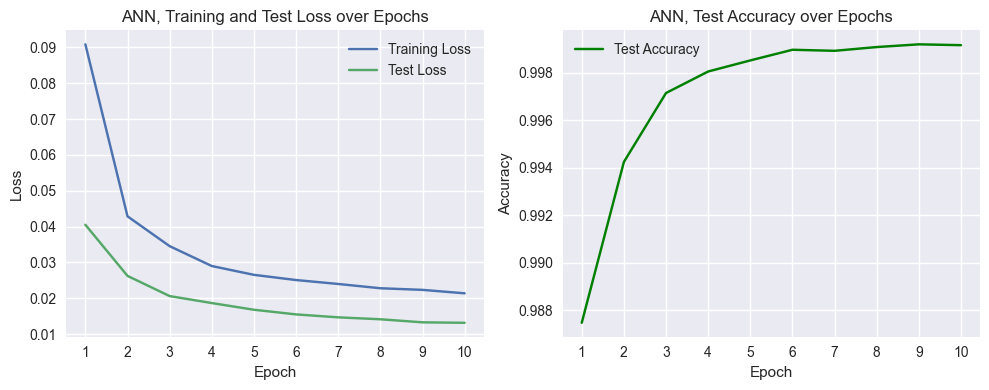

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the training and test losses
ax1.plot(range(1, epochs + 1), trn_losses, label='Training Loss')
ax1.plot(range(1, epochs + 1), tst_losses, label='Test Loss')
ax1.set_xticks(range(1, epochs + 1))  # x축 라벨 1단위씩 증가
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('ANN, Training and Test Loss over Epochs')
ax1.legend()

# Plot Test Accuracy
ax2.plot(range(1, epochs + 1), tst_accuracies, label='Test Accuracy', color='green')
ax2.set_xticks(range(1, epochs + 1))
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('ANN, Test Accuracy over Epochs')
ax2.legend()

plt.tight_layout(h_pad=1.0) # 그래프 간 간격 늘리기
plt.show()

In [31]:
tst_loss, accuracy, pred = test(device, tst_dl, model, loss_function, return_pred=True)

In [ ]:
pred

array([[5.4268877e-08],
       [4.8553449e-11],
       [2.4456829e-01],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9876791e-01]], dtype=float32)

In [ ]:
pred = (pred > 0.5).astype(int)
pred.shape

(113726, 1)

In [ ]:
y = np.array(tst_df["Class"]).reshape(-1, 1)
y
# y = scaler.inverse_transform(y)
# p = scaler.inverse_transform(pred)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, pred)
cm

array([[56673,   190],
       [   13, 56850]], dtype=int64)

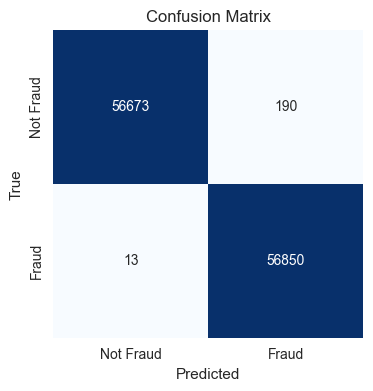

In [ ]:
# Seaborn을 사용하여 confusion matrix 시각화
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Not Fraud", "Fraud"],
            yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()